# **BUSI / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## **Class 23** - Text Analysis III : Representation Learning for Recommender Systems
*April 13, 2023*  
Version 2.1


# Today's Agenda

1. **Word Embeddings**
2. **Word2Vec**
3. **Book Recommender System**
4. **Word2Vec for Assortment Management**

## Prep-Check:

**Read before class:** Rust RT, Rand W, Huang M-H, Stephen AT, Brooks G, Chabuk T., 2021. Real-Time Brand Reputation Tracking Using Social Media. Journal of Marketing. 85(4):21-43. 

# ***Important***: Sentence Labeling Task

We need ***EVERYONE*** to label sentences drawn from reviews, reddit posts, and tweets on oral care.  These labels will allow all of ***YOU*** to train classifiers and/or fine-tune LLMs for you Major Class Project, should  you choose to do so.  (See class 24.)  You can use your computer or phone, and can take breaks and return to finish the labeling task later.  See instructions below. 

- Make sure to include your section and full name on the survey below to receive credit for participating. Failure to contribute to this task (i.e. failure to label 240 sentences) will negatively impact your class participation grade.

> **Follow this link to the Survey: **https://unc.az1.qualtrics.com/jfe/form/SV_816tOHmPHPZcDdQ?Q_DL=ZBOSt0UJg2uxEbw_816tOHmPHPZcDdQ_MLRP_8dzgmQFnbiK9JNs&Q_CHL=email  



This survey will ask you to label 240 sentences (in six batches of 40) that are drawn from a bank of over 5,700 sentences from reviews, reddit posts, and tweets about oral care products.

# 1 Word Embeddings
Word embeddings are ***vectors of numbers*** (row of real valued numbers) that ***represent*** the ***meaning*** of a ***word*** from the contexts it appears in. 

![](https://www.mapxp.app/BUSI488/embedding-sphere.jpg)  

[image source](https://randorithms.com/2020/11/17/Adding-Embeddings.html)




## 1.1 World without Word Embedding
**The problem of understanding text is not new:**

* Machine learning models for text used ***hand crafted features*** from data.   
    * **Bag-of-Words:** The count of tokens (words, n-grams)
    * **TF-IDF:**  Term frequency-inverse document frequency is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. Works by increasing proportionally to the number of times a word appears in a document but is offset by the number of documents that contain the word.  

* ***Syntactic relationships*** in text. **Syntax** is the study of sentence structure and the rules of grammar.
    - POS tags
    - Stemming
    - Lemmatization   

* ***Probabilistic Topic Modeling*** reveals hidden thematic structure of documents.
    - Latent Dirichlet allocation (**LDA**) is a generative model for collections of discrete data such as text corpora.
    - Represents documents as a bag-of-words
    - Document structure is neglected

**Challenge**

* ***Semantics***: Features like word count do not actually capture the meaning of a word or the context in which it is used, that is, the semantics. ***Semantics*** is the study of the meaning of sentences.

**Idea**
* Word Embeddings ***encode the meaning and context*** of words as a vector of numbers (because ML models only understand numbers).

* Word Embeddings are ***not defined by humans*** but are ***learned by a ML model*** during training. 
* No need to handcraft features

* **Important:** Embedded features are ***latent***, that is, they are not directly observable and interpretable to us! 


##1.2 What are Word Embeddings?

* Word embeddings are simply vectors of numbers (row of real valued numbers) that represent the meaning of a word based on the contexts it appears in.   

* Each point (i.e., column) in a word vector captures a dimension of the word’s meaning.  

* Semantically similar words (i.e., words that are used in a similar context) will have similar vectors.   

* Distance between two vectors = semantic similarity.  

* Word vectors lend themselves to mathematical operators: 
  - Addition
  - Subtraction
  - Summing
  - Averaging

***For Example:***

${WV(king) — WV(man) + WV(woman) = WV(queen)}$

- Subtract one meaning from the word vector for king (i.e., "maleness"), add another meaning (i.e., "femaleness")
- Show that this new word vector (king — man + woman) is most similar to the word vector for queen.


###1.2.1 What does a Word's Vector look like?

This is a word vector for the word “king”

${[ 0.50451 , 0.68607 , -0.59517 , -0.022801, 0.60046 , -0.13498 , -0.08813 , 0.47377 , -0.61798 , -0.31012 , -0.076666, 1.493 , -0.034189, -0.98173 , 0.68229 , 0.81722 , -0.51874 , -0.31503 , -0.55809 , 0.66421 , 0.1961 , -0.13495 , -0.11476 , -0.30344 , 0.41177 , -2.223 , -1.0756 , -1.0783 , -0.34354 , 0.33505 , 1.9927 , -0.04234 , -0.64319 , 0.71125 , 0.49159 , 0.16754 , 0.34344 , -0.25663 , -0.8523 , 0.1661 , 0.40102 , 1.1685 , -1.0137 , -0.21585 , -0.15155 , 0.78321 , -0.91241 , -1.6106 , -0.64426 , -0.51042 ]}$

- Here, vector of length 50
- Embedding length is a hyperparameter ...
-  ... of how many dimensions to embed words into 
- Vector length depends on a few factors like:
  * vocabulary size
  * computational resources
- No straightforward formula to calculate "correct" embedding length
- For large vocabulary typically length of 300 (dimensions = columns = numbers)


## 1.3 Visual Inspection of Word Vectors
- Below we consider word embeddings of length 50
- We create a 1-dimensional heatmap for the values of each vector dimension
  - red if they’re close to 2
  - white if they’re close to 0
  - blue if they’re close to -2
  - shades of red and blue for values between 0 and 2 as well as -2 and 0, respectively

Let’s now contrast “King” against other words:

![](https://www.mapxp.app/BUSI488/vector-similarity1)  
[image source](https://jalammar.github.io/illustrated-word2vec/)

- See how “Man” and “Woman” are much more similar to each other than either of them is to “king”? 
- Tells us something: Vector representations capture the meaning of words
- The meaning of a word is embedded as latent (i.e., hidden) features in the word's vector

Here’s another list of examples (compare by vertically scanning the columns looking for columns with similar colors):


![](https://www.mapxp.app/BUSI488/vector-similarity2)
[image source](https://jalammar.github.io/illustrated-word2vec/)

A few things to note:

1. There’s a straight red column through all of these different words. They’re similar along that dimension (and we don’t know what each dimension codes for).  

2. You can see how “woman” and “girl” are similar to each other in a lot of places. The same with “man” and “boy”.  

3. “boy” and “girl” also have places where they are similar to each other, but different from “woman” or “man”. Could these be coding for a vague conception of youth? Possibly. We cannot know for certain!  

4. All but the last word represent people.  

5. We added the word vector for "water" to show the differences between word's vectors relative to their meaning. You can, for example, see that blue column going all the way down and stopping before the vector of “water”  

5. There are several dimensions (i.e., columns) where “king” and “queen” are similar to each other and distinct from the other words' vectors. Could these be coding for a vague concept of royalty? Possibly, but we cannot know for certain. 



## 1.4 Visualize the Semantic Similarity of Words
-	Words that are similar or appear in similar contexts 
-	Word with similar context have similar word vectors
Let’s do some visual discovery of word similarities!

**For this visualization of word vectors**

* We will use a popular word2vec Python package called ***gensim***

* We will ***load a Google Pre-trained Word2Vec model*** from a publicly available google drive

* By pre-trained we mean that the model has already been trained on some data and has learned the word vector representations. 

* Remember that Word Embeddings are not defined by humans but are learned by an ML model during training.

* We will obtain the word embeddings for some words and visualize how similar they are using t-SNE.


In [19]:
# 0. Connect your Google Drive

# a. Import required package
from google.colab import drive

# b. Mount drive
drive.mount('/content/gdrive')

# c. Navigate to the folder of this class 
%cd /content/gdrive/MyDrive/488/Class23

# d. List the files that are in the current folder
!ls # special shell command to view the files in the home directory of the notebook environment

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Class23
488_2023_Class23.ipynb	books.csv


In [20]:
# 0. Check how much RAM we have available
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [21]:
# 1. Import some packages we will need
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from lxml import etree
import glob, csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
%%time
# 2a. Define name of the shortcut we've just created that points to the file
EMBEDDING_FILE = 'GoogleNews-vectors-negative300-500k.bin.gz' 

# 2b. Load embedding from the file - will take a moment!
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

# The original google news pre-trained model has a vocabulary of over 3 billion words, sorted by frequency
# I only used the first 500k words here to save RAM

CPU times: user 9.67 s, sys: 978 ms, total: 10.7 s
Wall time: 11.5 s


In [26]:
##### Other available models: https://radimrehurek.com/gensim/models/word2vec.html

### Load as follows (but count on waiting a long time for large models to download)
# import gensim.downloader

# # Show all available models in gensim-data
# print(list(gensim.downloader.info()['models'].keys()))

# # Load a full model (takes a long time!)
# google_word2vec = gensim.downloader.load('word2vec-google-news-300')

Dimensions: 300
First 10 dimensions of the word embedding for 'man': [ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455 ]


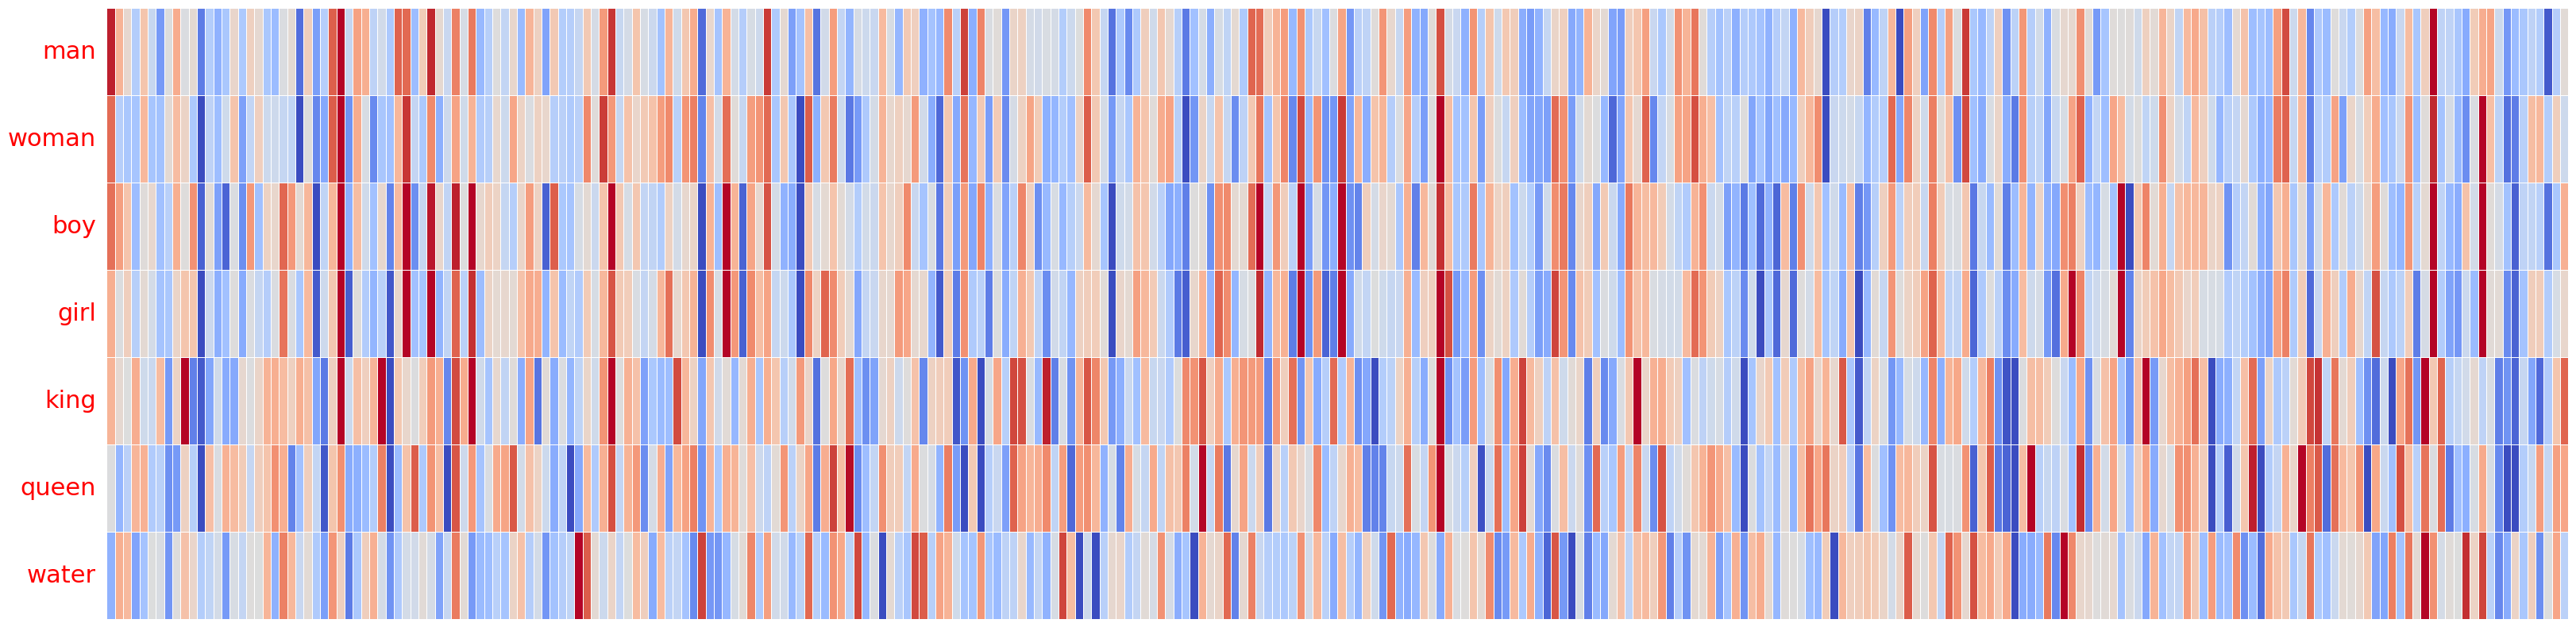

In [27]:
# 3. Create a string of words we are interested in
words = "man woman boy girl king queen water"
#words = "apple banana orange pear tomato onion cucumber carrot"
#words = "apple google facebook ibm microsoft samsung LG amazon"
#words = "tomato onion cucumber carrot banana orange pear Apple google facebook ibm microsoft samsung LG amazon"

# 4. Turn the string into individual tokens
word_tokens = words.split(' ')

# 5. Get word vectors from pre-trained word embedding for all tokens of our string
word_vectors = [google_word2vec[x] for x in word_tokens]
#df = pd.DataFrame(google_word2vec.get_normed_vectors()[word_vectors], index=word_vectors)

# 6. Show how long the vectors are
print(f"Dimensions: {len(word_vectors[0])}")

# 7. Show the first 10 "columns" for the word 'man'
print(f"First 10 dimensions of the word embedding for '{word_tokens[0]}': {word_vectors[0][:10]}") 

# 8. Visualize Word Vectors
sns.set(font_scale=2)
sns.set_style({"ytick.color": "red"})
f, ax = plt.subplots(figsize=(40, 10))
sns.heatmap(word_vectors, cmap='coolwarm', xticklabels=False, yticklabels=word_tokens, cbar=False, robust=True, linewidth=.5)
plt.yticks(rotation=0)
plt.show()

### 1.4.1 Dimensionality Reduction with t-SNE

- We can use t-SNE to reduce the dimensionality of the word vectors from 300 dimensions to 2 dimensions 

In [28]:
word_vectors[0]

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [29]:
# 1. Import required package
from sklearn.manifold import TSNE

# 2. Set value for perplexity: we have very few objects (i.e., words), therefore we set a very low value
perp = 3  # perplexity of similarity kernel

# 3. Set multiple Seeds for random initializations
sds=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
KL = []

# 4. Find best seed (i.e., lowest KL divergence)
for s in sds:
    tsne = TSNE(n_components = 2, perplexity = perp, init='random', learning_rate=100, random_state=s)
    X_tsne = tsne.fit_transform(np.array(word_vectors))
    KL.append(tsne.kl_divergence_)
    print(tsne.kl_divergence_, end=" ")

# 5. Fit Best Model
Y = TSNE(n_components = 2, perplexity = perp, init='random', learning_rate=100, verbose=1, random_state=sds[KL.index(min(KL))]).fit_transform(np.array(word_vectors))

0.018182745203375816 0.022791877388954163 0.05151359736919403 0.017510589212179184 0.0233122818171978 0.023856524378061295 0.01891482062637806 0.018315739929676056 0.05438356101512909 0.01807112619280815 [t-SNE] Computing 6 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.000s...
[t-SNE] Computed neighbors for 7 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 1.401266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.043552
[t-SNE] KL divergence after 1000 iterations: 0.017511


### 1.4.2 Visualization in an Interactive Map with Altair


- We can now visualize how similar words are based on their latent meanings on a map by treating the 2 dimensions of t-SNE as X and Y coordinates.

Altair is a powerful tool for interactive visualization in Python https://altair-viz.github.io/index.html

In [30]:
# 1. Create a new DataFrame that holds all the information we need for our map
import pandas as pd
df = pd.DataFrame(
    {'x': Y[:,0],
     'y': Y[:,1],
     'txt': words.split()
    })

# 2. Import Altair
import altair as alt

# 3. Plot the dataset by referencing DataFrame column names
base = alt.Chart(df).encode(
    x=alt.X('x', axis=alt.Axis(title="X", grid=True, labels=False), scale=alt.Scale(domain=[-500, 525])),
    y=alt.Y('y', axis=alt.Axis(title="Y", grid=True, labels=False), scale=alt.Scale(domain=[-300, 300]))
)

base.mark_circle(size=100) + base.mark_text(dx=25,fontSize=12).encode(text='txt').interactive().properties(height=600,width=600,title='Similarity of Word Vectors')

alt.LayerChart(...)

- The words `man` and `woman` are close together 
  - and are also close to `boy` and `girl`.
- The words `king` and queen are close to each other. 
- All words are further away from `water`.


### 1.4.3 Heat Map of Word Vectors

-	The value of representing words as word vectors comes from being able to compare words to see how similar they are. 
-	When dealing with vectors, a common way to calculate a similarity score is cosine similarity. 


<Axes: >

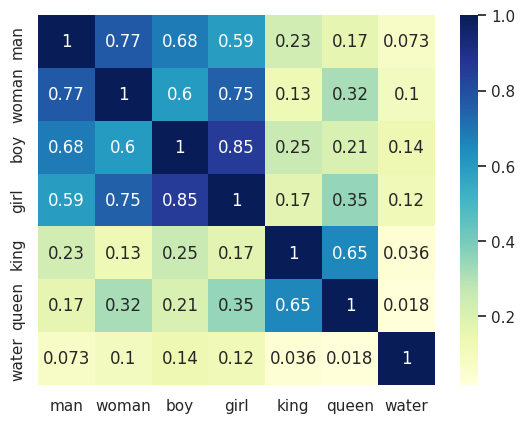

In [31]:
# 1. Import required packages
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# 2. Calculate Cosine Similarity for first word (man) - optional
cos_sim = cosine_similarity(word_vectors, np.tile(word_vectors[0], (7, 1)))[:, 1]

# 3. Generate Cosine Similarity Matrix
sim_matrix = cosine_similarity(word_vectors, word_vectors)

# 4. Get actual words
word_labels = [str(word) for word in word_tokens]

# 5. Generate Heat Map
sns.set(font_scale=1)
sns.heatmap(sim_matrix, annot=True, xticklabels=word_labels, yticklabels=word_labels, cmap="YlGnBu")

In [54]:
# 6. Free up some RAM by deleting what we don't need
word_vectors=[]
sim_matrix=[]
word_labels=[]
cos_sim=[]
base=[]
df=[]
tSNE=[]
Y=[]
KL=[]
ax=[]

## 1.5 Operations on Embeddings

Since word vectors are numbers, we can perform operations like addition, subtraction and averaging.   

- What is the motivation behind doing this? 
- What's going on under the hood? 
- Let's take a look!

**Example 1**
In the example we had when introducing word embeddings, we said that we could so something like this

$WV(king) — WV(man)+WV(woman)=WV(queen)$ 

That is, subtract one meaning from the word vector for king (i.e. maleness), add another meaning (femaleness) and that this new word vector (king — man + woman) is most similar to the word vector for queen.

![Word Embedding Arithmatic](https://www.mapxp.app/BUSI488/VisualWordArithmatic2.jpg "Word Embedding Arithmatic")



Let's take a look at this in code

In [55]:
# 1. Define Words (tokens)
words = ["king", "man", "woman"]
#words = ["google", "amazon", "LG"]

# 2. Get vectors from pre-trained model
word_vectors = [google_word2vec[x] for x in words]

# 3. Do the math! result = king - man + woman
result = word_vectors[0] - word_vectors[1] + word_vectors[2]

# 4. Most similar words to the result (note that as a heuristic, you might need to ignore the first, that is, most similar result)
google_word2vec.most_similar(positive=[result], topn=5)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916)]

<Axes: >

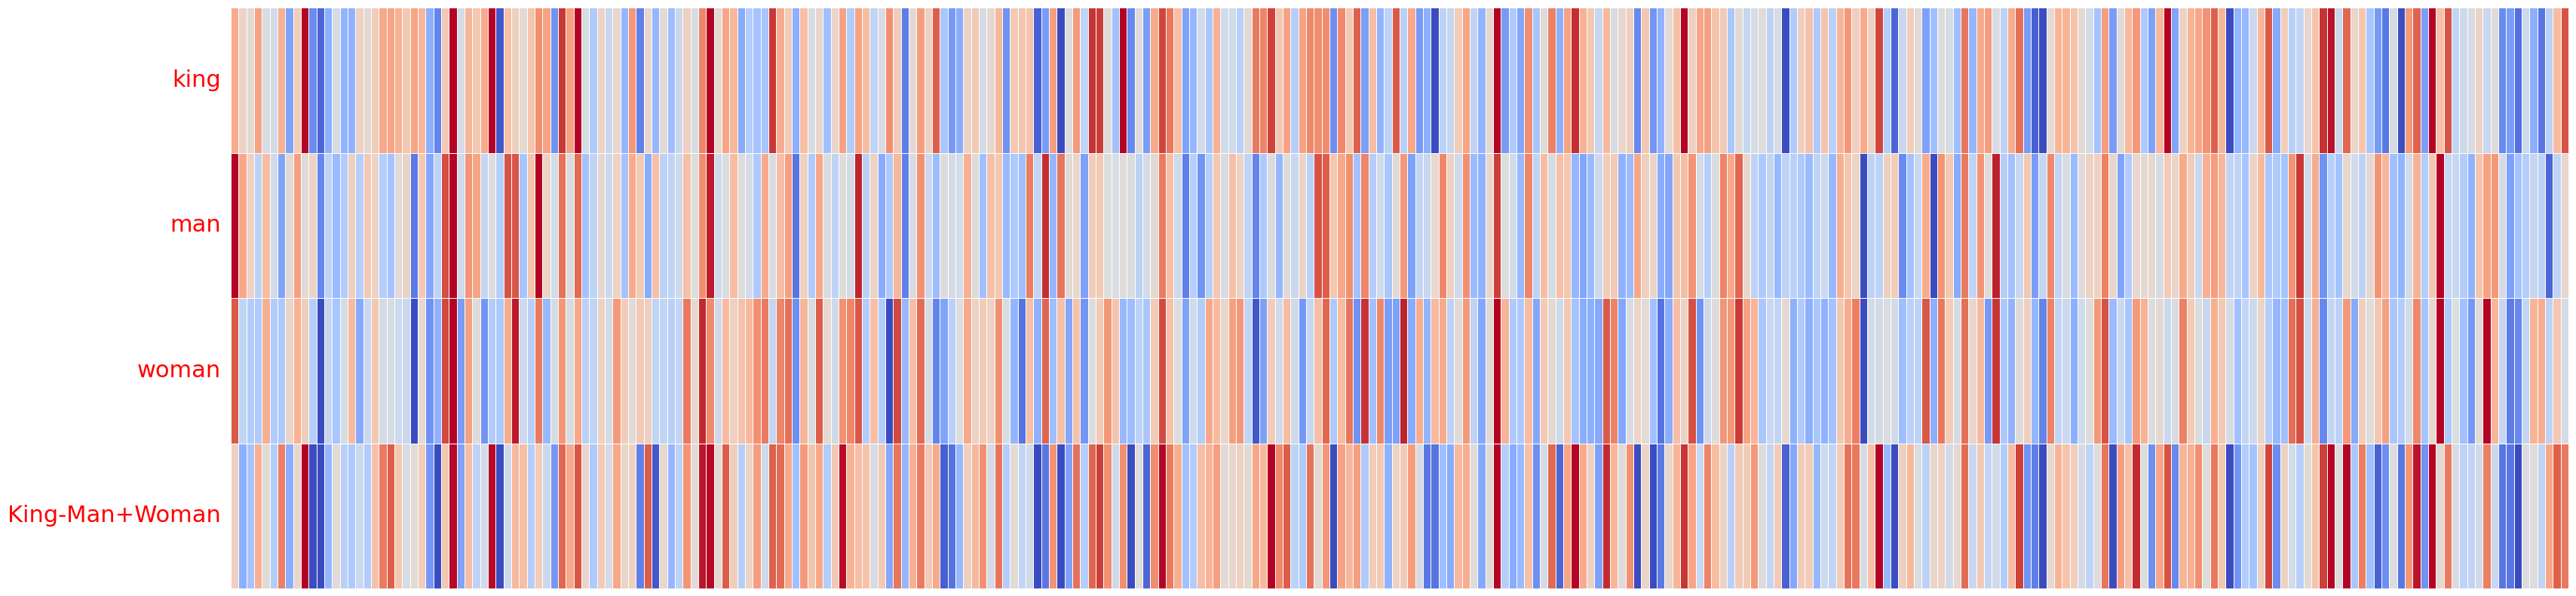

In [56]:
# 5. Append Calcualted Word Vector and Word
word_vectors.append(result)
words.append("King-Man+Woman")

# 6. Visualize Word Vectors
sns.set(font_scale=2)
sns.set_style({"ytick.color": "red"})
f, ax = plt.subplots(figsize=(40, 10))
sns.heatmap(word_vectors, cmap='coolwarm', xticklabels=False, yticklabels=words, cbar=False, robust=True, linewidth=.5)
#plt.yticks(rotation=0)

From the above example, we see that on subtracting `man` and adding `woman` to `king` we get a result that is close to `queen` (ignoring the query words itself) 

**Example 2:** We have 3 brothers (Huey, Dewey, and Louie) who like different sets of animals. 

![(c) www.disneyclips.com](https://www.disneyclips.com/characters/huey-dewey-louie.gif "Huey, Dewey, and Louie")


*We want to know how similar their preferences for animals are!*

1. Average the word vectors of the animals each of them likes to get a single vector that represents their favorites 

2. Compare averaged vectors

In [57]:
# 1. Average vectors for Huey
Huey_favorite_animals = ["penguin", "bear", "seal"]
Huey_favorite_vectors = [google_word2vec[x] for x in Huey_favorite_animals]
Huey_favorite = np.average(Huey_favorite_vectors, axis=0)

# 2. Average vectors for Dewey
Dewey_favorite_animals = ["mouse", "rat", "chipmunk"]
Dewey_favorite_vectors = [google_word2vec[x] for x in Dewey_favorite_animals]
Dewey_favorite = np.average(Dewey_favorite_vectors, axis=0)

# 3. Average vectors for Louie
Louie_favorite_animals = ["whale", "shark", "dolphin"]
Louie_favorite_vectors = [google_word2vec[x] for x in Louie_favorite_animals]
Louie_favorite = np.average(Louie_favorite_vectors, axis=0)

# 4. Compare
print("Similarity of of Huey's and Dewey's preferences for animals: " , cosine_similarity([Huey_favorite, Dewey_favorite])[0][1])
print("Similarity of of Huey's and Louie's preferences for animals: " , cosine_similarity([Huey_favorite, Louie_favorite])[0][1])
print("Similarity of of Dewey's and Louie's preferences for animals: " , cosine_similarity([Dewey_favorite, Louie_favorite])[0][1])

Similarity of of Huey's and Dewey's preferences for animals:  0.46113974
Similarity of of Huey's and Louie's preferences for animals:  0.56816924
Similarity of of Dewey's and Louie's preferences for animals:  0.3454122


In [58]:
favorits= np.stack((Huey_favorite,Dewey_favorite, Louie_favorite))

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Huey'), Text(0, 1.5, 'Dewey'), Text(0, 2.5, 'Louie')])

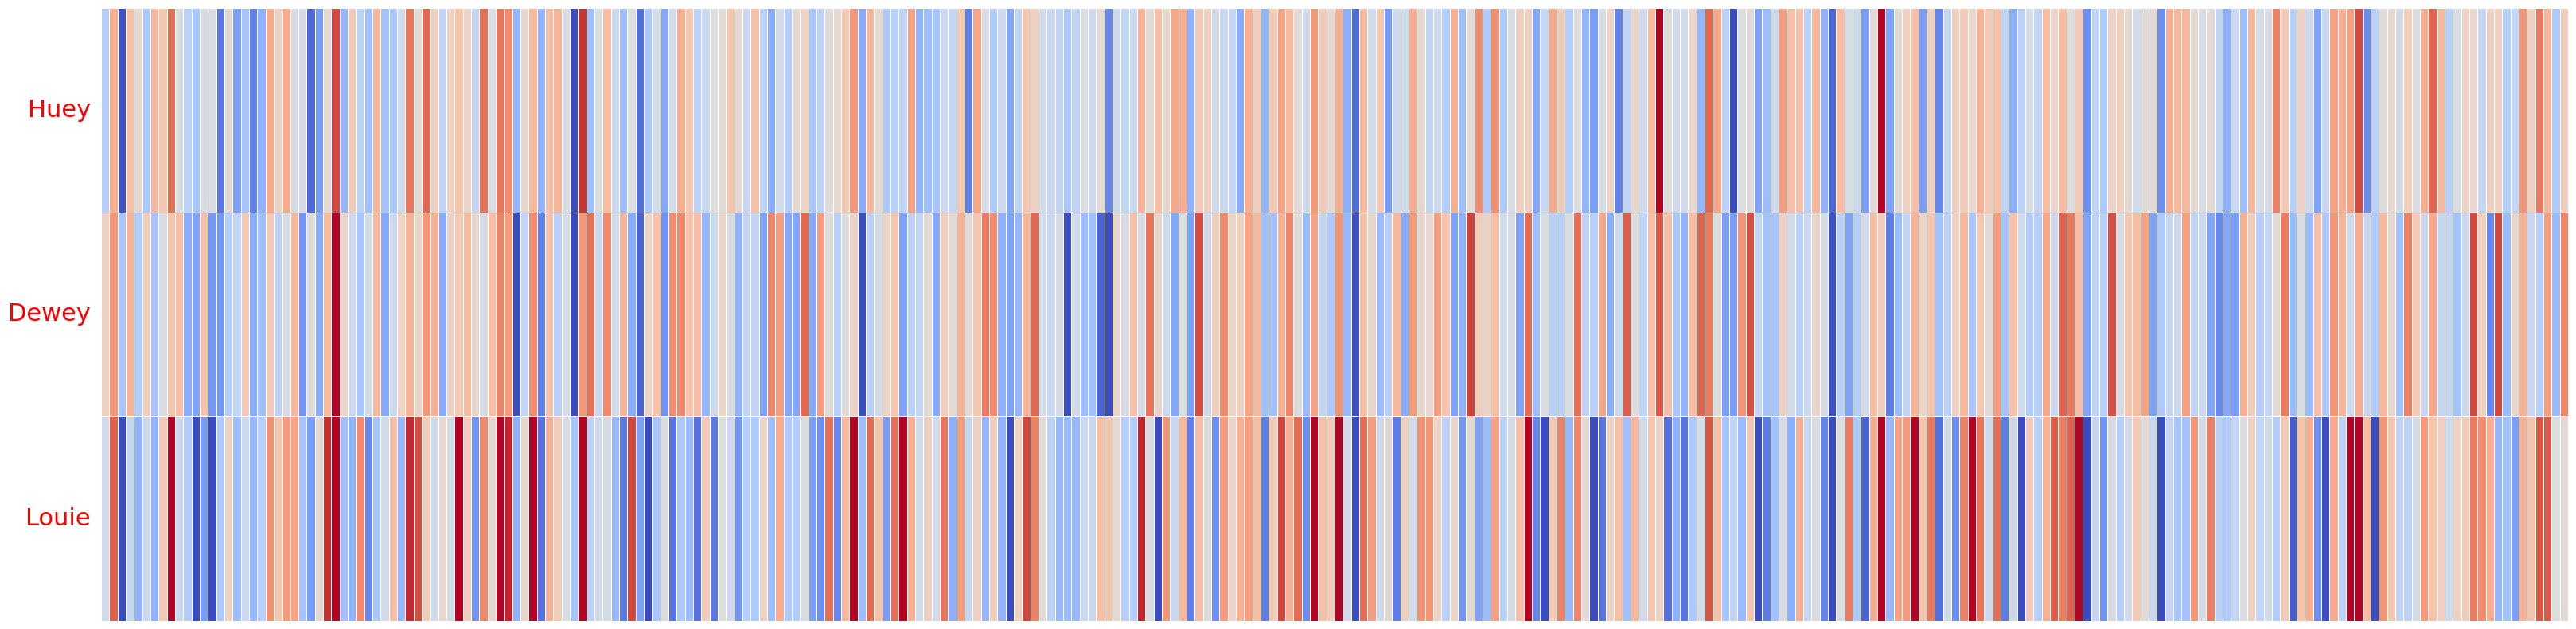

In [59]:
# 5. Visualize Mean Word Vectors in heatmaps
favorits= np.stack((Huey_favorite,Dewey_favorite, Louie_favorite))
borthers=["Huey", "Dewey", "Louie"]

sns.set(font_scale=2)
sns.set_style({"ytick.color": "red"})
f, ax = plt.subplots(figsize=(40, 10))
sns.heatmap(favorits, cmap='coolwarm', xticklabels=False, yticklabels=borthers, cbar=False, robust=True, linewidth=.5)
plt.yticks(rotation=0)

In this section, we learned that:

1. We can represent words as vectors of numbers.
2. We can easily calculate how similar vectors are to each other and also perform other mathematical operations.

# 2 Word2Vec

**Word2Vec is a popular model to train and obtain word embeddings**

* We just used a pre-trained Word2Vec model in our example above  

* Word2Vec is a computationally efficient model composed of a **two-layer neural network** (i.e., a shallow neural network)  

* The model ***learns word embeddings from raw text*** and is trained to reconstruct linguistic contexts of words.  

* The model ***input*** is a large text corpus. 

* The final ***output*** that we are interested in is a higher-dimensional vector space (i.e., word embeddings) where ***each unique word in the text corpus is embedded into a vector in this space***.   

* Words are embedded into word vectors such that
   - ***words that share common contexts*** in the text corpus ***have similar word vectors*** 
   - and are thus are ***located in close proximity*** to one another in the vector space.



## 2.1 Training Data
Training a Word2Vec model requires real-world text such that the model can learn which words appear in similar contexts.  

**Major Advantage:** We do not need human labeled data.   

We can train Word2Vec on various texts such as:
- Books
- News 
- Wikipedia content
- Congressional debates
- or any other ***abundant*** text data 

#### So how do we use such text data to train a word2vec model? 

1. We get a lot of text data (all Wikipedia articles, for example) and provide it to the model for training.  

2. The model then analyzes the context of words via a so-called "window"
   - the window contains words before and after a focal (i.e., input) word 
   - we can define how big this window should be (hyperparameter!) such as 2 words before and after the focal word.
   - you can think of this window "sliding" or "rolling" across the text as the model trains.  

3. The "sliding" window generates training samples for our model (i.e., words around a focal word are positive samples - these are our targets in skip-gram). 

4. The model then trains by trying to accurately predict the context words (i.e., targets) from a focal word (this approach is called skip-gram), or the focal word from its context (this approach is called CBOW), whereby the model corrects itself iteratively to make its predictions more and more accurate


![Contexts and Windows in Skip-Gram](https://www.mapxp.app/BUSI488/NeuralWordEmbedding4.jpg "Contexts and Windows in Skip-Gram")

**For Example:**
* Given a sentence: The data-breach at Sony betrayed my trust. 
* The focal word: Sony
* Window size = 2
* Context words (i.e., targets) are: data-breach, at, betrayed, my


## 2.2 Model Architecture

* Word2Vec is originally a **Shallow Neural Network** with a single hidden layer, and like all neural networks, it has weights which it adjusts during its training to reduce a loss function.

* We feed words as one-hot vectors, which is basically a vector of the same length as the vocabulary, filled with zeros except at the index that represents the word we want to represent, which is assigned “1”.

* The hidden layer is a standard fully connected (dense) layer whose weights are randomly initialized.

* The output layer outputs probabilities for the target words (i.e., context words) from the vocabulary. Each output node (a specific word) is connected by N weights to N hidden neurons. 

* The N weights for a specific output node (word) is the word embedding or word vector for that word. 

Over the course of **training** the **weights are adjusted** and the **vectors of words that share similar contexts become more and more similar.** By doing this the model learns the task of what words appear in context of an input word. 

![Skip-Gram: Shallow Neural Network](http://www.mapxp.app/BUSI488/NeuralWordEmbedding3a.jpg "Skip-Gram: Shallow Neural Network")

- When the feature vector assigned to a word ***cannot*** be used to accurately predict that word’s context, the components of the vector are adjusted (this is an iterative training process) 
- Each word's context in the corpus is the "teacher" that sends error signals back to adjust the feature vector 
- The feature vectors of words judged to be similar by their context are nudged closer together by adjusting the numbers in the vector
- The neural network is shallow because it has only 3 layers:
    - **Input layer** that serves as indicator for each word in the vocabulary
    - **Hidden layer**, which is what we are ultimately interested in: a feature vector for each word that was learned to encode context.n
    - **Output layer** that determines the context words from the feature vectors for each word: capture the probabilities that output words will be in close positions to a given word (i.e., the context of the word that is defined as a context window)


**How are the weights updated to learn the word vectors?**
* Learning is similar to a classification model.   

* The model takes as input a word and multiplying with the weights **predicts an output probability distribution over all the words in the vocabulary**. That is, we have **V class labels** where V is the size of the vocabulary.   

* This output probability is compared against the actual target word (i.e., the label) and the **error is computed**  

* This error is used to **update the weights using a technique called backpropagation.**  

* The weights are updated such that in the next iteration with this (input, label) pair the output error is lesser, that is, the prediction is closer to the target word


**The "Irony" of Training Word2Vec**

- Word2Vec is not used for the task it was trained on  

- Actually want to learn the hidden layer weight matrix   

- Throw away output layer  

- Rows of the hidden layer weight matrix = Word vectors (word embeddings) we want!



## 2.3 Skip-Gram with Negative Sampling (SGNS) Model

- **Word2Vec** provides a variety of methods of training a model. 
 - We will use Skip-Gram with Negative Sampling (**SGNS**)
 - Continuous Bag-of-Words (**CBOW**) model is another option   
   


- **Skip-gram** predicts surrounding context words from the target words. 
  - Number of surrounding words defined as hyperparameter (window)  


- **Skip-Gram with Negative Sampling** improves computational efficiency substantially:

  - Switch the model’s task 
    - from predicting a neighboring word 
    - to predicting whether a word pair (input and output) are neighbors (0 for “not neighbors”, 1 for “neighbors”)
  - ***Changes model*** 
    - *from* a shallow neural network
    - *to* a logistic regression model
  - Much simpler and much faster to calculate!






**Algorithm**  

1. Treat an input (focal) word and a neighboring context word (target) as positive examples
2. Randomly sample other words in the lexicon (i.e., vocabulary) to get negative samples
3. Predict if neighbors or not, and calculate error
4. Update feature weights of word pairs

###2.3.1 SGNS Step 1

Generate positive samples (or examples) using a sliding window size = 2.  

![](https://www.mapxp.app/BUSI488/sgns-1.jpg)


For computational efficiency, ***we do not want to predict the target word (i.e., context words) directly!***

Need **labels** in our training data:
- For our word pairs (input word with each target word)
SGNS creates positive label (1) on its own


![](https://www.mapxp.app/BUSI488/sgns-2xs.jpg)


**Problem:** We only have positive labels.





### 2.3.2 SGNS Step 2

- A classifier such as logistic regression needs both positive and negative samples. 
- So far, we only have positive samples.

**Idea:** Introduce negative samples into our dataset with words that are not neighbors to input word.
- Randomly samples words from total vocabulary. 

![](https://www.mapxp.app/BUSI488/sgns-3.jpg)


### 2.3.3 SGNS Step 3

- For each input-target word pair (i.e., positive samples), draw *N* negative samples (*N* is a hyperparameter)
- Calculate similarity of input word to context candidates (i.e., target word and negative samples) using dot product of their vectors
- Turn similarity scores into something that looks like probabilities using the sigmoid function (i.e., [logistic operation](https://en.wikipedia.org/wiki/Logistic_function) where you "squash" value in range 0 to 1 along an s-shape curve)
- Subtract sigmoid from target to get error: `Error = Target - Sigmoid`

For a more elaborate explanation, see this great [tutorial](https://jalammar.github.io/illustrated-word2vec/).  


### 2.3.3 SGNS Step 4

Adjust (or update) vectors in word embedding (i.e., hidden weights matrix) using backpropagation based on the errors of step 3 such that the prediction error is minimized for:

  - input word vector
  - target word vector
  - vectors of negative samples

Continue for other word-pairs

For a more formal and technical explanation see this great [tutorial](https://aegis4048.github.io/demystifying_neural_network_in_skip_gram_language_modeling ) 

# 3 Recommender System for Books based on Text

**Problem:** What book would you recommend to a customer whose favorite book is a murder-mystery by Agatha Christie?

**Question:** What book features can we use to build a recommender system for books? 

What about ***Structured Data*** such as features of books?

- We can't really use features like the number of pages, is the book hardbound etc. because they aren't very informative of the content of the book.
- We could recommend books to her by the same author but then that limits the diversity of recommendations 
- Genre may be a helpful feature but there are so many books under the category of murder-mystery
- If we knew of other users who maybe clicked on some other books online, after reading the same Agatha Christie book, we could use that information for recommendation - but that information can be noisy.

What about ***Unstructured Data*** such as content of books?
- Requires a way to encode the content of a book summary such that computers can understand it and recommend similar books.

**Idea: Recommender System using Word2Vec**   
If we can identify similar books based on the word vectors of their descriptions, then we can easily have a machine recommend books to customers.   

***Advantage:*** Because we can find similar books based on the words in books, our approach will also work for future books that we have not seen yet!

***Challenge:*** We've learned that we can encode words as vectors. But can we do that for an entire book description?   

Let's give it a try!


- When we discussed operations on vectors we learned that we can ***average vectors*** to obtain a ***single vector to represent the content***. 

- We can do the same with books:
  - Average the word vectors of the words in the book description 
  - to obtain a single word vector that encodes the book description

- In this content-based book recommendation system, we recommend books to a user by considering the similarity in book descriptions. 
- We find similar books by computing Cosine Similarity of the book embeddings and then recommend those similar books to the user. 
- Book embeddings are computed using Word embeddings from the Word2Vec model. 


In [60]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from io import BytesIO

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.1 Dataset

- We use a dataset that was obtained by scraping book details from [Goodreads](https://goodreads.com) pertaining to business and non-fiction genres. 
- The data consist of 2382 books. 
- There are two genres:
  - Business (1185 books) 
  - Fiction (1197 books) 
- The available book features include:
  - Title 
  - Short description
  - Author 
  - Rating
  - Book image link

 Dataset Source: https://github.com/sdhilip200/Content-Based-Recommendation---Good-Reads-data 

In [61]:
# 1. Read the data
books = pd.read_csv("books.csv", index_col=False)
books.head()

,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [62]:
print(books.Desc[4])

Amazing book. And I joined Steve Jobs and many more from the Akio Morita fan club.Did you know that he was such a sensation that Steve Jobs wanted to build Apple to be like Sony? Here are the similarities- Both Apple and Sony had a reputation of creating perfectly crafted consumer products which conquer the marketplace. Apple still does, in fact.Both companies were leaders in "personal technology". This is where Apple drew inspiration from Sony's Walkman, an inspiration which culminated in the


## 3.2 Text Preprocessing

Since we want to use the book description to compute embeddings, we first clean the book description (i.e. text preprocessing) and store the cleaned description in a new variable called ‘cleaned’.

In [63]:
# 1. Utitlity functions 
# a. Remove ASCII
def remove_non_ascii(s):
    return "".join(i for i in s if ord(i) < 128)

# b. Make all words lower case
def make_lower_case(text):
    return text.lower()

# c. Remove stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# d. Remove HTML
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# e. Remove punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [64]:
# Let's clean up!

# 2. Make sure the descritions are of type string and create new column to operate on "cleaned"
books['cleaned'] = books['Desc'].astype(str)

# 3. Pass data into utility functions
books['cleaned'] = books.cleaned.apply(remove_non_ascii)
books['cleaned'] = books.cleaned.apply(make_lower_case)
books['cleaned'] = books.cleaned.apply(remove_stop_words)
books['cleaned'] = books.cleaned.apply(remove_punctuation)
books['cleaned'] = books.cleaned.apply(remove_html)

We then split each description into word tokens and store it in a list called ‘corpus’ for training our word2vec model.

In [65]:
# 4. Split the cleaned description into word tokens
corpus = []
for row in books['cleaned']:
    corpus.append(row.split())

## 3.3 Transfer Learning: Fine-Tuning a Word2Vec Model

**Problem:** 
* ***Training*** our own word embeddings is an ***expensive process*** (compute power and time) and also requires a large dataset. We don’t have a large dataset as we scraped Goodreads data which only pertains to the genres of business and fiction. 

**Solution:** 
* Use Google ***pre-trained word embeddings***, which were trained on a large corpus, including Wikipedia, news articles and more. 

**Problem:**
* However, since the model was trained on a large corpus including Wikipedia articles, news etc. it ***may not have a similar vocabulary as the Goodreads dataset***. For example: It may not know that the words `Harry` and `Hermione` should be close together and may not even contain the word `Hermione` in its vocabulary, since it may not have come across Harry Potter

In order to add the previously unseen words, present in the Goodreads vocabulary to the model, and we fine-tune the pre-trained model on the Goodreads dataset corpus.

**Solution:** 
* We can add unseen words to the vocabulary of the model and teach it new contexts of words by **fine-tuning a pre-trained model**. This means that we use the weights of the existing pre-trained model and adjust them through training, so it learns the new information present in the Goodreads corpus.


In [66]:
# 0 If you have not loaded the model yet, then run this code:
EMBEDDING_FILE = 'GoogleNews-vectors-negative300-500k.bin.gz'

In [67]:
# 1. Initialise the Word2Vec Model with embedding vector_size = 300, window = 5 
# and min_count = 2 i.e. the minimum number of times a word should appear in the corpus
google_model = Word2Vec(vector_size=300, window=5, min_count=2, seed=42)

In [68]:
%%time
# Note: We have downloaded the pre-trained model already when visualising word vectors using t-SNE

#Step 1: We start by incorporating the vocabulary of our specific corpus into the google model
google_model.build_vocab(corpus)

#Step 2: We obtain the word vectors for the words in the vocabulary that are already present in pre-trained word2vec model.
google_model.wv.vectors_lockf = np.ones(len(google_model.wv))
google_model.wv.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

#Step 3: We fine-tune the model to learn new contexts of words in our corpus
google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

CPU times: user 17.6 s, sys: 315 ms, total: 17.9 s
Wall time: 14 s


(1242306, 1338465)

In [69]:
# 2. Print the top 10 most similar words using cosine similarity
google_model.wv.most_similar(positive=["business"])

[('entrepreneurial', 0.7095659375190735),
 ('startup', 0.7085608243942261),
 ('sales', 0.7077445983886719),
 ('investment', 0.6971316933631897),
 ('mckinsey', 0.6957057118415833),
 ('professional', 0.693111777305603),
 ('successful', 0.6928001642227173),
 ('firm', 0.680715024471283),
 ('company', 0.6787909269332886),
 ('today', 0.674180805683136)]

In [70]:
google_model.wv.most_similar(positive=["castle"])

[('mansion', 0.7744176983833313),
 ('abbey', 0.7010866403579712),
 ('persian', 0.6972225904464722),
 ('thursby', 0.6869973540306091),
 ('julia', 0.6868835091590881),
 ('castles', 0.6843889355659485),
 ('1920s', 0.6838693022727966),
 ('brianna', 0.6835310459136963),
 ('astrid', 0.6824425458908081),
 ('alba', 0.6819098591804504)]

We now have a Word2Vec model with word vectors fine-tuned on the Goodreads Corpus.

However, in our problem, we have book descriptions, which are sequences of words. We need to convert book descriptions into vectors to find the similarity between them and recommend books. 

To obtain vectors for the book descriptions, we need some way of combining the individual word vectors in the description to obtain a vector for the book. 

**Idea:** Average the vectors of all words in a book's description

## 3.4 Averaging Word Vectors
 
- As you now know, Word2vec takes a word and gives a D-dimension vector. 
- Since we have book descriptions which are sentences or sequences of words, we first need to split the sentences into words and find the vectors representation for each word in the sentence.

**Consider a book description has N words. Let’s denote the words as** ${w_1, w_2, w_3, w_4 …w_N}$. 

1. We first calculate Word2Vec for all the N words.
2. We then sum all the word vectors and divide the same by the total number of words in the description to obtain the average word vector (V1). 

$${ V_1 = \frac{W2V(w_1) + W2V(w_2) + W2V(w_3) + W2V(w_4) + ….. + W2V(w_N)}{N} }$$ 

- Here, vectors are in D-dimensional space, where D = 300.

- N = number of words in description 1

- v1 = vector representation of book description 1

- In this way, each book description can be converted into a unique vector.


In [71]:
%%time
# Generate the average word2vec for the each book description

# 1. Define a function that we can call for each book description
def average_vectors(df):
    # Creating a list for storing the vectors (description into vectors)
    embeddings = []

    # For each book, create an average vector from all the words in its description
    for line in df['cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in google_model.wv.index_to_key:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model.wv[word]
                else:
                    avgword2vec = avgword2vec + google_model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            embeddings.append(avgword2vec)

    return embeddings

# 2. Apply function to all book descriptions
book_embeddings = average_vectors(books)

CPU times: user 17.7 s, sys: 318 ms, total: 18.1 s
Wall time: 17.7 s


In [72]:
book_embeddings[0]

array([ 4.85343263e-02,  1.09342150e-01, -4.98998584e-03,  2.10741729e-01,
       -1.27898663e-01, -7.61239082e-02,  1.08280092e-01, -1.76548004e-01,
        2.37394065e-01,  1.29190281e-01, -9.39064994e-02, -2.18893006e-01,
       -1.69524420e-02,  1.33467972e-01, -2.75344461e-01,  2.21745938e-01,
        6.29481301e-02,  2.58254409e-01,  8.15308020e-02, -1.49430767e-01,
       -4.03905101e-02,  8.94137621e-02,  8.42194445e-03,  3.72167751e-02,
        8.04652646e-02,  1.59572978e-02, -1.71677858e-01,  1.09077208e-01,
        4.05593626e-02, -1.41682610e-01, -6.56483471e-02, -1.97698716e-02,
       -1.35403961e-01,  6.10922500e-02,  1.40136600e-01,  3.39020230e-02,
        2.99094934e-02, -6.31005690e-02,  2.13736385e-01,  1.25513658e-01,
        2.26357907e-01,  1.37916803e-02,  1.37405977e-01,  6.63555190e-02,
       -6.44983053e-02, -8.67800713e-02, -1.15465797e-01,  7.22606704e-02,
       -3.16592716e-02,  7.78427944e-02, -2.37712427e-03,  5.84205464e-02,
       -1.43086746e-01, -

## 3.5 Recommend Books

We now use these average book embeddings to find similar books and make recommendations

In [73]:
# Function to recommend the Top 5 similar books
def recommendations(title, book_embeddings, books):
    
    # 1. Find cosine similarity for the vectors
    cosine_similarities = cosine_similarity(book_embeddings, book_embeddings)

    # 2. Take the title and book image link and store in new data frame called books
    book_covers = books[['title', 'image_link']]

    # 3. Create a mapping from book title to index
    indices = pd.Series(books.index, index = books['title']).drop_duplicates()
         
    # 4. Get the index of the book title we need recommendations from     
    idx = indices[title]

    # 5. Obtain the cosine similarities of the title with all other book from the similarity matrix
    # Sim scores is a list of tuples of (book_index, cosine_simialrity)
    sim_scores = list(enumerate(cosine_similarities[idx]))

    # 6. Sort similarity scores by descending order
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)

    # 7. Pick the top 5 most similar books. Exclude index 0 as that would be the book itself
    sim_scores = sim_scores[1:6]

    # 8. Obtain the book indices of the top 5 books
    book_indices = [i[0] for i in sim_scores]

    # 9.Obtain the book cover and title of the top 5 books
    recommend = book_covers.iloc[book_indices]
    recommend.reset_index(inplace=True)

    # 10. Output the book image
    plt.figure()
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        axes[index].imshow(img)
 

<Figure size 640x480 with 0 Axes>

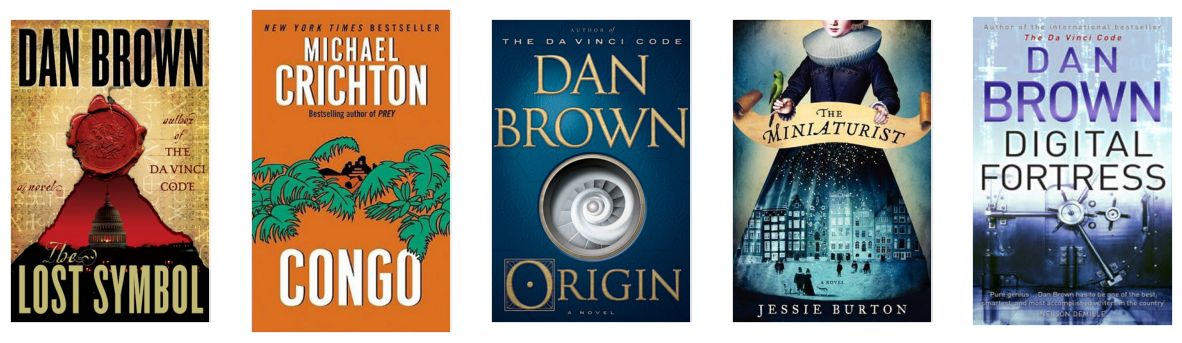

In [74]:
# Let's call our function and pass it a book title to get recommendations for similar books
#recommendations("Harry Potter and the Prisoner of Azkaban", book_embeddings, books)
recommendations("Angels & Demons", book_embeddings, books)


We see that the model recommends other Harry Potter books and some other fiction novels

<Figure size 640x480 with 0 Axes>

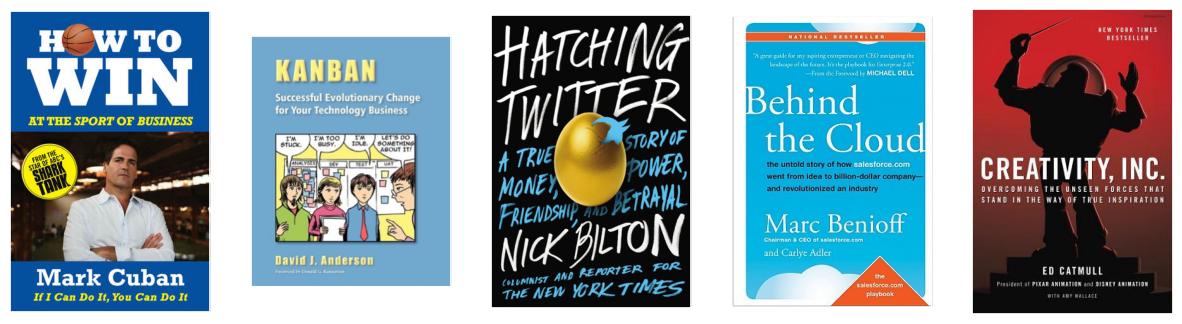

In [75]:
# Let's call our function and pass it a book title to get recommendations for similar books
recommendations("Steve Jobs", book_embeddings, books)
#recommendations("The Four Pillars of Investing", book_embeddings, books)

We see that the model recommends other non-fiction books related to tech and business

# 4 Word2Vec for Assortment Management

![Word2Vec for Assortment Management](https://www.mapxp.app/BUSI488/prod2vec.jpg "Word2Vec for Assortment Management")


Check-out the two studies below that demonstrate how word2vec can be used for basket analysis and assortment management. These studies use models that you have already learned about in this course including k-means,t-SNE and word2vec:

- **Item2Vec: Neural Item Embedding for Collaborative Filtering** https://arxiv.org/abs/1603.04259
- **P2V-MAP: Mapping Market Structures for Large Retail Assortments** https://journals.sagepub.com/doi/10.1177/0022243719833631

# ***Important***: Sentence Labeling Task

We need ***EVERYONE*** to label sentences drawn from reviews, reddit posts, and tweets on oral care.  These labels will allow all of ***YOU*** to train classifiers and/or fine-tune LLMs for you Major Class Project, should  you choose to do so.  (See class 24.)  You can use your computer or phone, and can take breaks and return to finish the labeling task later.  See instructions below. 

- Make sure to include your section and full name on the survey below to receive credit for participating. Failure to contribute to this task (i.e. failure to label 240 sentences) will negatively impact your class participation grade.

> **Follow this link to the Survey: **https://unc.az1.qualtrics.com/jfe/form/SV_816tOHmPHPZcDdQ?Q_DL=ZBOSt0UJg2uxEbw_816tOHmPHPZcDdQ_MLRP_8dzgmQFnbiK9JNs&Q_CHL=email  



This survey will ask you to label 240 sentences (in six batches of 40) that are drawn from a bank of over 5,700 sentences from reviews, reddit posts, and tweets about oral care products.

# **Looking Ahead:**  

####**Next Class:** Tuesday, April 18, 2023  

#### **Text Analysis IV:** Large Language Models

----------

#### **Read before class:**   
Hartmann, J., Huppertz, J., Schamp, C., & Heitmann, M., 2019. Comparing automated text classification methods. International Journal of Research in Marketing, 36(1), 20-38.


# References


Article on Recommender System for Books:
* https://www.kdnuggets.com/2020/08/content-based-recommendation-system-word-embeddings.html
